In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib
from joblib import dump, load


In [2]:
df = pd.read_csv('/SSD/p76111262/CIC2018_csv/preprocess_attack.csv')
df.head()

,Dst Port,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Protocol,Label
0,21,14/02/2018 22:33:26,3.650000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,BruteForce-FTP
1,21,14/02/2018 22:33:55,4.675000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,BruteForce-FTP
2,21,14/02/2018 22:34:24,3.600000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,BruteForce-FTP
3,21,14/02/2018 22:34:53,3.200000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,BruteForce-FTP
4,21,14/02/2018 22:35:22,4.266667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,BruteForce-FTP


In [3]:
# 刪除 'Timestamp' 欄位
columns_to_delete = ['Timestamp']
df.drop(columns_to_delete, axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           2644 non-null   int64  
 1   Flow Duration      2644 non-null   float64
 2   Tot Fwd Pkts       2644 non-null   float64
 3   Tot Bwd Pkts       2644 non-null   float64
 4   TotLen Fwd Pkts    2644 non-null   float64
 5   TotLen Bwd Pkts    2644 non-null   float64
 6   Fwd Pkt Len Max    2644 non-null   float64
 7   Fwd Pkt Len Min    2644 non-null   float64
 8   Fwd Pkt Len Mean   2644 non-null   float64
 9   Fwd Pkt Len Std    2644 non-null   float64
 10  Bwd Pkt Len Max    2644 non-null   float64
 11  Bwd Pkt Len Min    2644 non-null   float64
 12  Bwd Pkt Len Mean   2644 non-null   float64
 13  Bwd Pkt Len Std    2644 non-null   float64
 14  Flow Byts/s        2644 non-null   float64
 15  Flow Pkts/s        2641 non-null   float64
 16  Flow IAT Mean      2644 

In [5]:
df.isnull().sum().to_dict()

{'Dst Port': 0,
 'Flow Duration': 0,
 'Tot Fwd Pkts': 0,
 'Tot Bwd Pkts': 0,
 'TotLen Fwd Pkts': 0,
 'TotLen Bwd Pkts': 0,
 'Fwd Pkt Len Max': 0,
 'Fwd Pkt Len Min': 0,
 'Fwd Pkt Len Mean': 0,
 'Fwd Pkt Len Std': 0,
 'Bwd Pkt Len Max': 0,
 'Bwd Pkt Len Min': 0,
 'Bwd Pkt Len Mean': 0,
 'Bwd Pkt Len Std': 0,
 'Flow Byts/s': 0,
 'Flow Pkts/s': 3,
 'Flow IAT Mean': 0,
 'Flow IAT Std': 0,
 'Flow IAT Max': 0,
 'Flow IAT Min': 0,
 'Fwd IAT Tot': 0,
 'Fwd IAT Mean': 0,
 'Fwd IAT Std': 0,
 'Fwd IAT Max': 0,
 'Fwd IAT Min': 0,
 'Bwd IAT Tot': 0,
 'Bwd IAT Mean': 0,
 'Bwd IAT Std': 0,
 'Bwd IAT Max': 0,
 'Bwd IAT Min': 0,
 'Fwd PSH Flags': 0,
 'Bwd PSH Flags': 0,
 'Fwd URG Flags': 0,
 'Bwd URG Flags': 0,
 'Fwd Header Len': 0,
 'Bwd Header Len': 0,
 'Fwd Pkts/s': 0,
 'Bwd Pkts/s': 0,
 'Pkt Len Min': 0,
 'Pkt Len Max': 0,
 'Pkt Len Mean': 0,
 'Pkt Len Std': 0,
 'Pkt Len Var': 0,
 'FIN Flag Cnt': 0,
 'SYN Flag Cnt': 0,
 'RST Flag Cnt': 0,
 'PSH Flag Cnt': 0,
 'ACK Flag Cnt': 0,
 'URG Flag Cnt': 0,


In [6]:
df = df.fillna(0)
df.isnull().sum().to_dict()

{'Dst Port': 0,
 'Flow Duration': 0,
 'Tot Fwd Pkts': 0,
 'Tot Bwd Pkts': 0,
 'TotLen Fwd Pkts': 0,
 'TotLen Bwd Pkts': 0,
 'Fwd Pkt Len Max': 0,
 'Fwd Pkt Len Min': 0,
 'Fwd Pkt Len Mean': 0,
 'Fwd Pkt Len Std': 0,
 'Bwd Pkt Len Max': 0,
 'Bwd Pkt Len Min': 0,
 'Bwd Pkt Len Mean': 0,
 'Bwd Pkt Len Std': 0,
 'Flow Byts/s': 0,
 'Flow Pkts/s': 0,
 'Flow IAT Mean': 0,
 'Flow IAT Std': 0,
 'Flow IAT Max': 0,
 'Flow IAT Min': 0,
 'Fwd IAT Tot': 0,
 'Fwd IAT Mean': 0,
 'Fwd IAT Std': 0,
 'Fwd IAT Max': 0,
 'Fwd IAT Min': 0,
 'Bwd IAT Tot': 0,
 'Bwd IAT Mean': 0,
 'Bwd IAT Std': 0,
 'Bwd IAT Max': 0,
 'Bwd IAT Min': 0,
 'Fwd PSH Flags': 0,
 'Bwd PSH Flags': 0,
 'Fwd URG Flags': 0,
 'Bwd URG Flags': 0,
 'Fwd Header Len': 0,
 'Bwd Header Len': 0,
 'Fwd Pkts/s': 0,
 'Bwd Pkts/s': 0,
 'Pkt Len Min': 0,
 'Pkt Len Max': 0,
 'Pkt Len Mean': 0,
 'Pkt Len Std': 0,
 'Pkt Len Var': 0,
 'FIN Flag Cnt': 0,
 'SYN Flag Cnt': 0,
 'RST Flag Cnt': 0,
 'PSH Flag Cnt': 0,
 'ACK Flag Cnt': 0,
 'URG Flag Cnt': 0,


In [7]:
# 取得float64類型可表示的最大值和最小值
max_float = np.finfo(np.float64).max
min_float = np.finfo(np.float64).min

# 僅選擇數值類型的欄位進行操作
numeric_cols = df.select_dtypes(include=[np.number])

# 遍歷所有數值列，分別取代正無窮大和負無窮大值
for col in numeric_cols:
    df[col] = df[col].replace([np.inf], max_float)
    df[col] = df[col].replace([-np.inf], min_float)

# 檢查替換是否成功
if not df.select_dtypes(include=[np.number]).applymap(np.isfinite).all().all():
    print("仍存在無窮大值或NaN。")
else:
    print("所有無窮大值已成功替換。")
    
# 篩選出所有數值類型的列
numeric_cols = df.select_dtypes(include=[np.number])

# 檢查數值類型的欄位是否包含無限大值
columns_with_inf = numeric_cols.columns.to_series()[np.isinf(numeric_cols).any()]

# 找出包含無窮大值的行索引
rows_with_inf = numeric_cols.index[np.isinf(numeric_cols).any(axis=1)]

# 列印結果
print("包含無窮大值的欄位:", columns_with_inf)
print("包含無窮大值的行索引:", rows_with_inf.tolist())

所有無窮大值已成功替換。
包含無窮大值的欄位: Series([], dtype: object)
包含無窮大值的行索引: []


Dst Port           0
Flow Duration      0
Tot Fwd Pkts       0
Tot Bwd Pkts       0
TotLen Fwd Pkts    0
                  ..
Idle Mean          0
Idle Std           0
Idle Max           0
Idle Min           0
Protocol           0
Length: 78, dtype: int64
Dst Port           0
Flow Duration      0
Tot Fwd Pkts       0
Tot Bwd Pkts       0
TotLen Fwd Pkts    0
                  ..
Idle Mean          0
Idle Std           0
Idle Max           0
Idle Min           0
Protocol           0
Length: 78, dtype: int64


/home/p76111262/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/p76111262/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


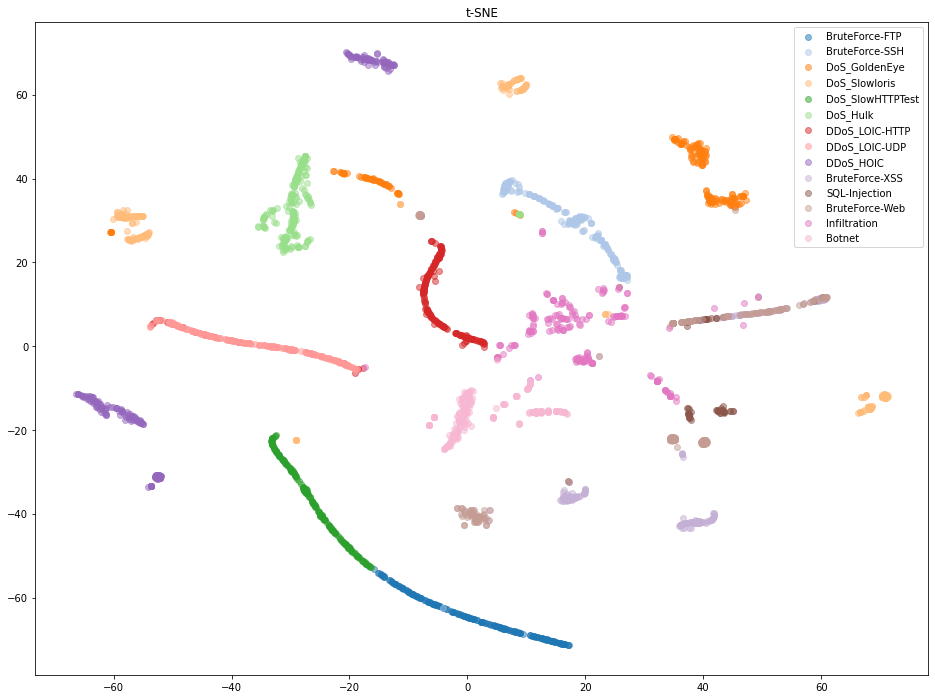

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

# 選擇您想要可視化的特徵列（假設Label列為最後一列）
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]  # 假設Label列為最後一列

# 檢查缺失值
print(features.isnull().sum())
print(features.isna().sum())

# 對特徵列進行最小-最大標準化
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# 使用 t-SNE 降維至二維
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
tsne_result = tsne.fit_transform(features_scaled)

# 獲取唯一的標籤值
unique_labels = labels.unique()

# 使用不同的顏色來表示每個類別
colors = plt.cm.tab20.colors

# 繪製 t-SNE 的散點圖，不同標籤使用不同顏色
plt.figure(figsize=(16, 12))
for i, label in enumerate(unique_labels):
    indices = labels == label
    plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1], alpha=0.5, label=label, color=colors[i])
plt.title('t-SNE')
plt.legend()
plt.show()
plt.savefig('pictures/all_label.png')


In [ ]:
# 假設 data 是你的DataFrame，'target' 是目標變數的列名
X = df.drop('Label', axis=1) # 特徵
y = df['Label'] # 目標變數

# 初始化MinMaxScaler
scaler = MinMaxScaler()

# 對特徵進行擬合和轉換
X_scaled = scaler.fit_transform(X)

joblib.dump(scaler, '/SSD/p76111262/CIC2018_csv/min_max_scaler.joblib')

label_encoder = LabelEncoder()

# 將目標變數中的字串標籤轉換為數值型標籤
y_encoded = label_encoder.fit_transform(y)

# 劃分資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 建立XGBoost模型
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# 訓練模型
model.fit(X_train, y_train)

# 使用測試集進行預測
y_pred = model.predict(X_test)

# 計算並列印準確率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/home/p76111262/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/p76111262/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 98.30%


Fwd Act Data Pkts: 0.12947134673595428
URG Flag Cnt: 0.1082044467329979
Init Bwd Win Byts: 0.09648850560188293
TotLen Bwd Pkts: 0.08424878865480423
Bwd Pkts/s: 0.0664350613951683
Down/Up Ratio: 0.05559605732560158
Bwd IAT Min: 0.05322985723614693
Bwd Pkt Len Std: 0.0500858910381794
Bwd Pkt Len Min: 0.04853808879852295
Dst Port: 0.04388046637177467
Tot Bwd Pkts: 0.029084304347634315
Bwd IAT Mean: 0.027650732547044754
Tot Fwd Pkts: 0.026360027492046356
Init Fwd Win Byts: 0.01714203506708145
ACK Flag Cnt: 0.014982298947870731
Fwd PSH Flags: 0.013621832244098186
Pkt Len Max: 0.011682013049721718
Idle Std: 0.010893827304244041
Bwd Header Len: 0.01051515806466341
Fwd Pkt Len Mean: 0.010023935697972775
Fwd Seg Size Min: 0.009594603441655636
RST Flag Cnt: 0.00879135262221098
Fwd Header Len: 0.007581687066704035
Flow IAT Min: 0.00670499075204134
Fwd Pkt Len Std: 0.006077858153730631
Fwd Pkts/s: 0.005611636210232973
Flow IAT Mean: 0.005073039326816797
Fwd Pkt Len Max: 0.0045747309923172
Pkt Len 

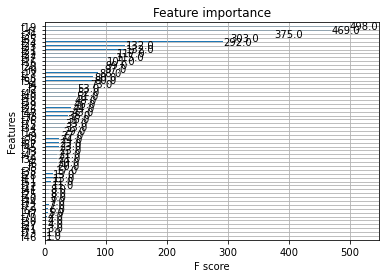

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
for score, name in sorted(zip(feature_importances, X.columns.tolist()), reverse=True):
    print(f'{name}: {score}')

# 特徵重要性可視化
plot_importance(model)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train, y_train)  # 訓練模型
y_pred = knn.predict(X_test)  # 預測測試集
accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
print(f"KNN Accuracy: %.2f%%" % (accuracy * 100.0))

KNN Accuracy: 93.76%
